## KNN from scratch

In [187]:
from collections import Counter
from sklearn.datasets.samples_generator import make_blobs
from numpy import linalg as LA

def distance(v, w):
    return LA.norm(v - w)

"""assumes that labels are ordered from nearest to farthest
Reduce k until we find a unique winner."""
def majority_vote(labels):
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values()
                          if count == winner_count])
    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest


def knn_classify(k, labeled_points, labels, new_points):
    predict_labels = []
    for x in new_points:
        dist = [[distance(a, x), labels[i]] 
            for i, a in enumerate(labeled_points)]
        k_nearest_labels = np.array(sorted(dist))[:k].T[1]
        predict_labels.append(majority_vote(k_nearest_labels))
    return np.array([predict_labels])


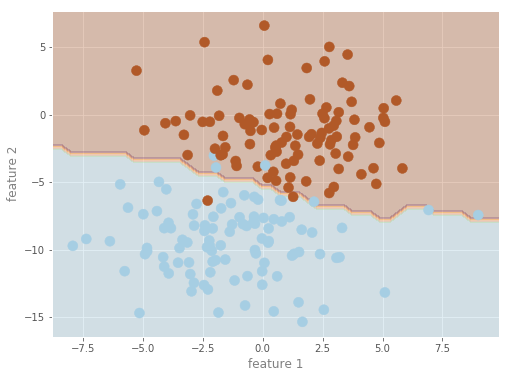

In [189]:
## Model and visulization
plt.style.use('ggplot')

X, Y = make_blobs(n_samples=200, centers=2,
                  random_state=2, cluster_std=2.50)
    
k = 5
    
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_xlabel('feature 1', color='gray')
ax.set_ylabel('feature 2', color='gray')
ax.scatter(X[:, 0], X[:, 1], c=Y, s=100, cmap='Paired', zorder=3)
    
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
# create grid to evaluate model
x = np.linspace(xlim[0], xlim[1], 50)
y = np.linspace(ylim[0], ylim[1], 50)
yy, xx = np.meshgrid(y, x)
xy = np.vstack([xx.ravel(), yy.ravel()]).T

zz = knn_classify(k, X, Y, xy)
zz = zz.reshape(xx.shape)
ax.contourf(xx, yy, zz, cmap='Paired', alpha=0.3, zorder=1)

A bit slow, but it works.